# SUTRA VS OpenAI Models

<img src="https://play-lh.googleusercontent.com/_O9p4Z4yucA2NLmZBu9mTJCuBwXeT9NcbtrDN6I8gKlkIPRySV0adOmbyipjSj9Gew" width="150">

<a href="https://colab.research.google.com/drive/175pEoGuZX_6s2lxzXiiT4lYS76QIdg-k?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

This notebook provides a comparison between Sutra V2 and OpenAI models across various tasks and capabilities. By directly comparing these models, you can make informed decisions about which model best suits your specific use cases.

## Get Your API Keys

Before you begin, make sure you have:

1. A SUTRA API key (Get yours at [TWO AI's SUTRA API page](https://www.two.ai/sutra/api))
2. Basic familiarity with Python and Jupyter notebooks

This notebook is designed to run in Google Colab, so no local Python installation is required.

## Setup

First, let's install the necessary libraries and set up our environment.

In [ ]:
# Install required packages
!pip install openai requests pandas matplotlib seaborn

### Import necessary libraries


In [ ]:
# Import necessary libraries
import os
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from openai import OpenAI
from IPython.display import display, Markdown, HTML
from google.colab import userdata
import html  # For escaping HTML entities

## Authentication

To compare both models, we need to set up API keys for both Sutra and OpenAI.

In [ ]:
# Get API key from Colab secrets
os.environ["SUTRA_API_KEY"] = userdata.get('SUTRA_API_KEY')
os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

###  Create clients for both APIs


In [ ]:
# Create clients for both APIs
sutra_client = OpenAI(
    base_url="https://api.two.ai/v2",
    api_key=os.environ.get("SUTRA_API_KEY")
)

openai_client = OpenAI(
    api_key=os.environ.get("OPENAI_API_KEY")
)

## Helper Functions

Let's create helper functions to interact with both APIs and evaluate their responses.

In [ ]:
def get_sutra_response(prompt, temperature=0, max_tokens=1024):
    """
    Get a response from Sutra V2.

    Args:
        prompt (str): The user prompt or question
        temperature (float): Controls randomness (0 to 1)
        max_tokens (int): Maximum number of tokens to generate

    Returns:
        str: The model's response
        float: Time taken to get the response
    """
    start_time = time.time()

    try:
        response = sutra_client.chat.completions.create(
            model="sutra-v2",
            messages=[{"role": "user", "content": prompt}],
            max_tokens=max_tokens,
            temperature=temperature
        )

        end_time = time.time()
        return response.choices[0].message.content, end_time - start_time

    except Exception as e:
        end_time = time.time()
        return f"Error: {str(e)}", end_time - start_time

def get_openai_response(prompt, model="gpt-4o", temperature=0, max_tokens=1024):
    """
    Get a response from an OpenAI model.

    Args:
        prompt (str): The user prompt or question
        model (str): The OpenAI model to use
        temperature (float): Controls randomness (0 to 1)
        max_tokens (int): Maximum number of tokens to generate

    Returns:
        str: The model's response
        float: Time taken to get the response
    """
    start_time = time.time()

    try:
        response = openai_client.chat.completions.create(
            model=model,
            messages=[{"role": "user", "content": prompt}],
            max_tokens=max_tokens,
            temperature=temperature
        )

        end_time = time.time()
        return response.choices[0].message.content, end_time - start_time

    except Exception as e:
        end_time = time.time()
        return f"Error: {str(e)}", end_time - start_time


def compare_responses(prompt, openai_model="gpt-4o", temperature=0, max_tokens=1024):
    """
    Compare responses from Sutra V2 and an OpenAI model.

    Args:
        prompt (str): The user prompt or question
        openai_model (str): The OpenAI model to use
        temperature (float): Controls randomness (0 to 1)
        max_tokens (int): Maximum number of tokens to generate

    Returns:
        dict: Dictionary containing the prompt, responses, and timing information
    """
    # Get responses from both models
    sutra_response, sutra_time = get_sutra_response(prompt, temperature, max_tokens)
    openai_response, openai_time = get_openai_response(prompt, openai_model, temperature, max_tokens)

    # Escape HTML characters in the responses to ensure safe rendering
    escaped_sutra_response = html.escape(sutra_response)
    escaped_openai_response = html.escape(openai_response)

    # Display the results
    display(HTML(f"<h3>Prompt:</h3><p>{html.escape(prompt)}</p>"))

    display(HTML(
        f"<h4>Sutra V2 Response:</h4>"
        f"<pre style='background-color:#f5f5f5; color:#000; padding:10px; border-radius:5px;'>{escaped_sutra_response}</pre>"
        f"<p><b>Time:</b> {sutra_time:.2f} seconds</p>"
    ))

    display(HTML(
        f"<h4>{openai_model} Response:</h4>"
        f"<pre style='background-color:#f5f5f5; color:#000; padding:10px; border-radius:5px;'>{escaped_openai_response}</pre>"
        f"<p><b>Time:</b> {openai_time:.2f} seconds</p>"
    ))

    display(HTML("<hr>"))

    return {
        "Prompt": prompt,
        "Sutra Response": sutra_response,
        "Sutra Time": sutra_time,
        "OpenAI Model": openai_model,
        "OpenAI Response": openai_response,
        "OpenAI Time": openai_time
    }

## Comparison 1: General Knowledge and Factual Accuracy

Let's compare how both models handle general knowledge questions.

In [ ]:
general_knowledge_prompts = [
    "What is the capital of France and what are some famous landmarks there?",
    "Explain the process of photosynthesis in simple terms.",
    "Who wrote 'Pride and Prejudice' and what is the main theme of the novel?"
]

general_knowledge_results = []

for prompt in general_knowledge_prompts:
    result = compare_responses(prompt)
    general_knowledge_results.append(result)

## Comparison 2: Multilingual Capabilities

Sutra V2 is known for its multilingual capabilities. Let's compare how it handles different languages compared to OpenAI models.

In [ ]:
multilingual_prompts = {
    "Hindi": "भारत के पांच प्रमुख पर्यटन स्थलों के बारे में बताएं।",  # Tell me about five major tourist places in India
    "Spanish": "Explica la importancia de la diversidad cultural en la sociedad moderna.",  # Explain the importance of cultural diversity in modern society
    "French": "Décrivez les avantages et les inconvénients du travail à distance.",  # Describe the advantages and disadvantages of remote work
    "Arabic": "اشرح أهمية الذكاء الاصطناعي في مجال الرعاية الصحية."  # Explain the importance of AI in healthcare
}

multilingual_results = []

for language, prompt in multilingual_prompts.items():
    display(HTML(f"<h3>Language: {language}</h3>"))
    result = compare_responses(prompt)
    result["Language"] = language
    multilingual_results.append(result)

## Comparison 3: Code Generation

Let's compare the code generation capabilities of both models.

In [ ]:
code_prompts = [
    "Write a Python function to check if a string is a palindrome.",
    "Create a JavaScript function that sorts an array of objects by a specific property."
]

code_results = []

for prompt in code_prompts:
    result = compare_responses(prompt)
    code_results.append(result)

## Comparison 4: Creative Writing

Now let's compare creative writing capabilities.

In [ ]:
creative_prompts = [
    "Write a short poem about the changing seasons.",
    "Create a brief story about a traveler who discovers a hidden village in the mountains."
]

creative_results = []

for prompt in creative_prompts:
    result = compare_responses(prompt, temperature=0.7)  # Higher temperature for creativity
    creative_results.append(result)

## Comparison 5: Complex Reasoning

Let's compare how both models handle complex reasoning tasks.

In [ ]:
reasoning_prompts = [
    "A ball and a bat cost $1.10 in total. The bat costs $1.00 more than the ball. How much does the ball cost?",
    "If it takes 5 machines 5 minutes to make 5 widgets, how long would it take 100 machines to make 100 widgets?"
]

reasoning_results = []

for prompt in reasoning_prompts:
    result = compare_responses(prompt)
    reasoning_results.append(result)

## Performance Analysis

Let's analyze the performance of both models across different tasks.

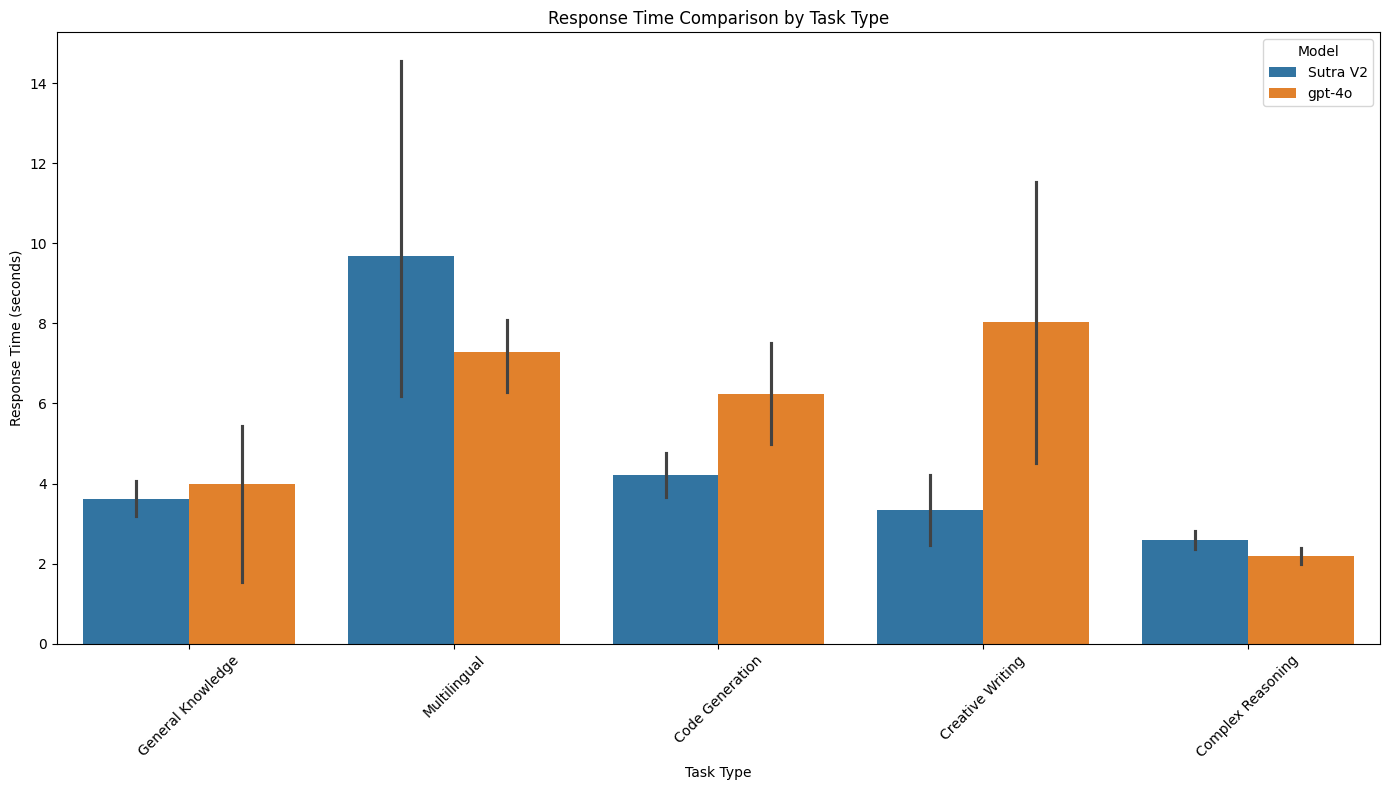

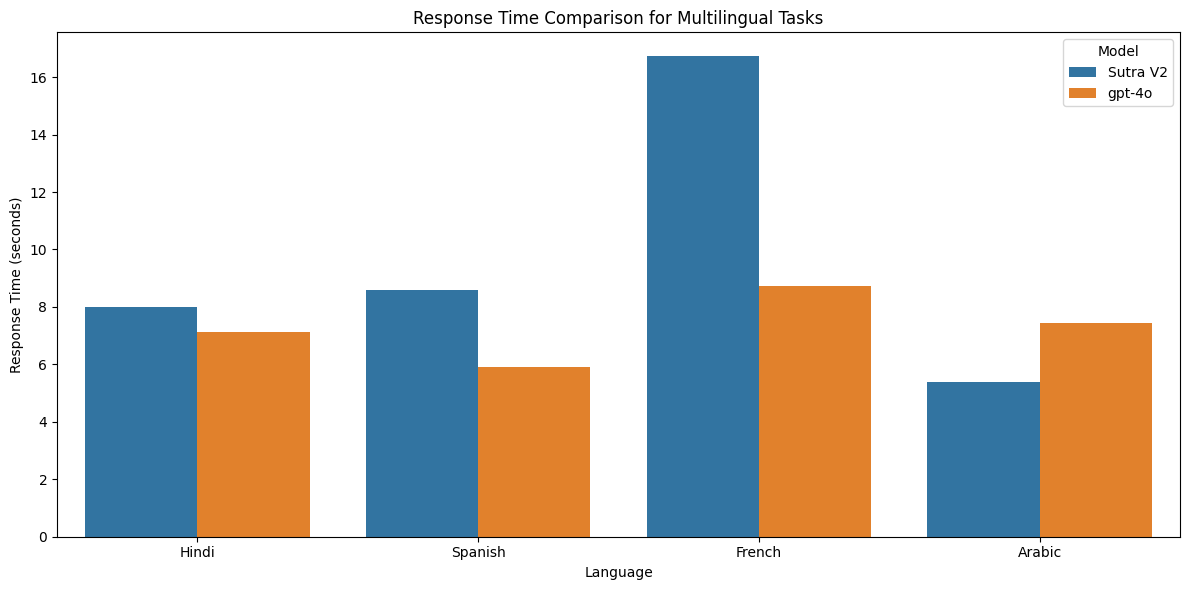

In [ ]:
# Combine all results
all_results = (
    general_knowledge_results +
    multilingual_results +
    code_results +
    creative_results +
    reasoning_results
)

# Extract timing data
timing_data = []
for result in all_results:
    if "Language" not in result:
        result["Language"] = "English"  # Default language

    timing_data.append({
        "Task Type": "General Knowledge" if result in general_knowledge_results else
                    "Multilingual" if result in multilingual_results else
                    "Code Generation" if result in code_results else
                    "Creative Writing" if result in creative_results else
                    "Complex Reasoning",
        "Language": result["Language"],
        "Model": "Sutra V2",
        "Response Time": result["Sutra Time"]
    })

    timing_data.append({
        "Task Type": "General Knowledge" if result in general_knowledge_results else
                    "Multilingual" if result in multilingual_results else
                    "Code Generation" if result in code_results else
                    "Creative Writing" if result in creative_results else
                    "Complex Reasoning",
        "Language": result["Language"],
        "Model": result["OpenAI Model"],
        "Response Time": result["OpenAI Time"]
    })

# Convert to DataFrame
timing_df = pd.DataFrame(timing_data)

# Visualization: Response time comparison by task type
plt.figure(figsize=(14, 8))
sns.barplot(x='Task Type', y='Response Time', hue='Model', data=timing_df)
plt.title('Response Time Comparison by Task Type')
plt.xlabel('Task Type')
plt.ylabel('Response Time (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization: Response time comparison by language
plt.figure(figsize=(12, 6))
multilingual_timing = timing_df[timing_df['Task Type'] == 'Multilingual']
sns.barplot(x='Language', y='Response Time', hue='Model', data=multilingual_timing)
plt.title('Response Time Comparison for Multilingual Tasks')
plt.xlabel('Language')
plt.ylabel('Response Time (seconds)')
plt.tight_layout()
plt.show()

## Response Length Analysis

Let's also compare the length of responses from both models.

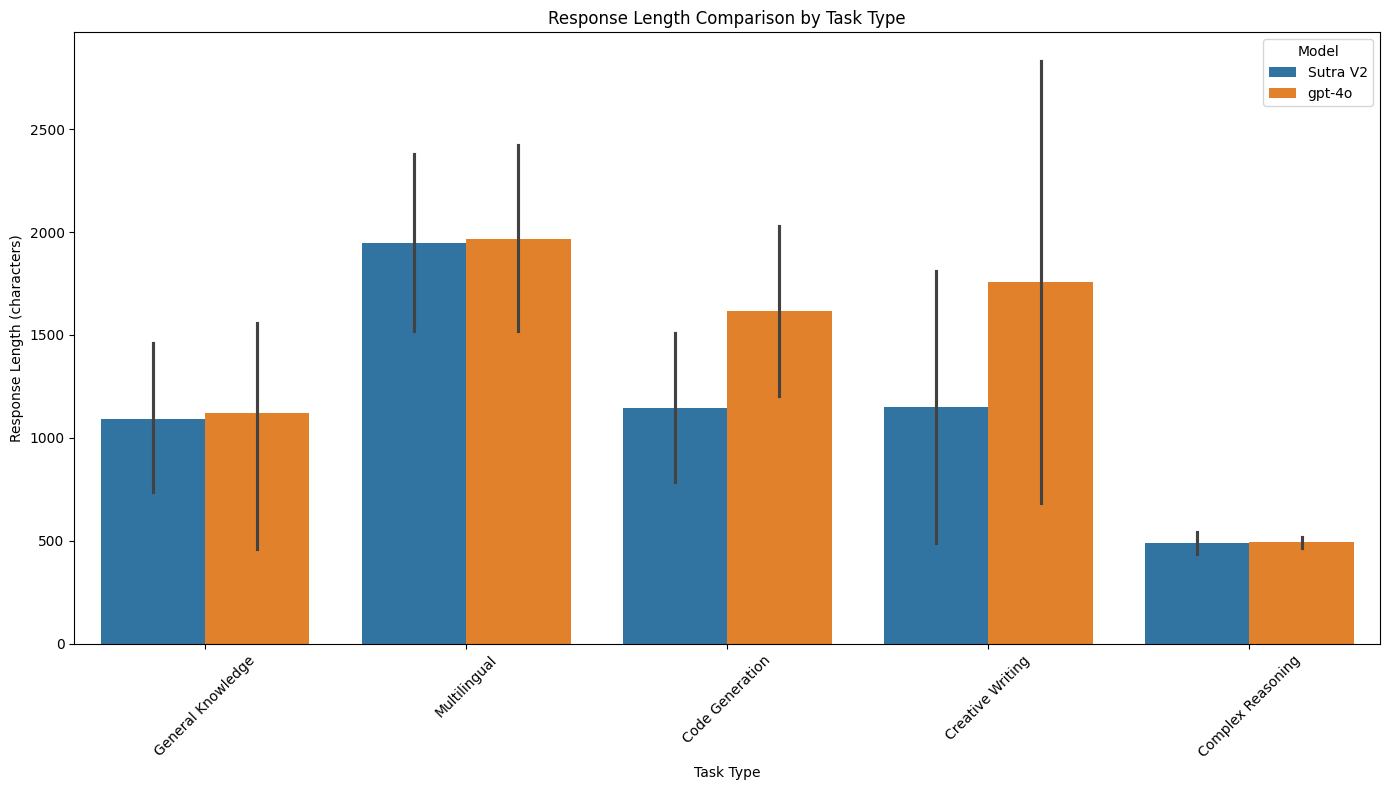

In [ ]:
# Extract response length data
length_data = []
for result in all_results:
    if "Language" not in result:
        result["Language"] = "English"  # Default language

    length_data.append({
        "Task Type": "General Knowledge" if result in general_knowledge_results else
                    "Multilingual" if result in multilingual_results else
                    "Code Generation" if result in code_results else
                    "Creative Writing" if result in creative_results else
                    "Complex Reasoning",
        "Language": result["Language"],
        "Model": "Sutra V2",
        "Response Length": len(result["Sutra Response"])
    })

    length_data.append({
        "Task Type": "General Knowledge" if result in general_knowledge_results else
                    "Multilingual" if result in multilingual_results else
                    "Code Generation" if result in code_results else
                    "Creative Writing" if result in creative_results else
                    "Complex Reasoning",
        "Language": result["Language"],
        "Model": result["OpenAI Model"],
        "Response Length": len(result["OpenAI Response"])
    })

# Convert to DataFrame
length_df = pd.DataFrame(length_data)

# Visualization: Response length comparison by task type
plt.figure(figsize=(14, 8))
sns.barplot(x='Task Type', y='Response Length', hue='Model', data=length_df)
plt.title('Response Length Comparison by Task Type')
plt.xlabel('Task Type')
plt.ylabel('Response Length (characters)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Conclusion

This notebook has provided a comparison between Sutra V2 and OpenAI models across various tasks and capabilities. Here are the key takeaways:

1. **Multilingual Capabilities**: Sutra V2 demonstrates exceptional performance across a wide range of languages, particularly excelling in Indic and Far Eastern languages. This makes it an excellent choice for applications requiring multilingual support.

2. **Performance Characteristics**: Both models show different strengths in terms of response time, length, and quality across different types of tasks.

3. **Task-Specific Performance**:
   - **General Knowledge**: Both models demonstrate strong factual knowledge
   - **Code Generation**: Both can generate functional code with good syntax
   - **Creative Writing**: Both produce creative and contextually appropriate content
   - **Complex Reasoning**: Both can handle multi-step reasoning tasks

4. **Use Case Recommendations**:
   - Choose Sutra V2 for applications requiring:
     - Broad multilingual support, especially for Indic and Far Eastern languages
     - Cost-efficient deployment at scale
     - Consistent performance across diverse domains
   
   - Choose OpenAI models for applications requiring:
     - Cutting-edge performance on complex reasoning tasks
     - Advanced code generation
     - Extensive English language capabilities

The best model choice ultimately depends on your specific use case, language requirements, and performance needs. This comparison should help you make an informed decision based on your application's requirements.